In [17]:
# Load Dependencies 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#Files to load
city_data_path = "Resources/city_data.csv"
ride_data_path = "Resources/ride_data.csv"

In [18]:
# read files and store in dataframe
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [19]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [20]:
# initial exploration of data

ride_data_df.isnull().sum()           #no missing data for both df
city_data_df.dtypes                   #proper dtypes for both df
ride_data_df.groupby("city").count()  #count of number of data points per city

city_data_df["type"].unique()         # ['Urban', 'Suburban', 'Rural']
sum(city_data_df["type"] == "Rural")  # Urban = 66,  Suburban = 36,  Rural = 18

18

In [21]:
# Merge DataFrames   new_df = pd.merge(leftdf, rightdf, how="left", on=["column_leftdf", "column_rightdf"])

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
#create Urban, Suburban, and Rural city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

# get number of rides for each city by each type of city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# get Average city fare for each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# get Average nimber of drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

print(len(urban_avg_fare))

66


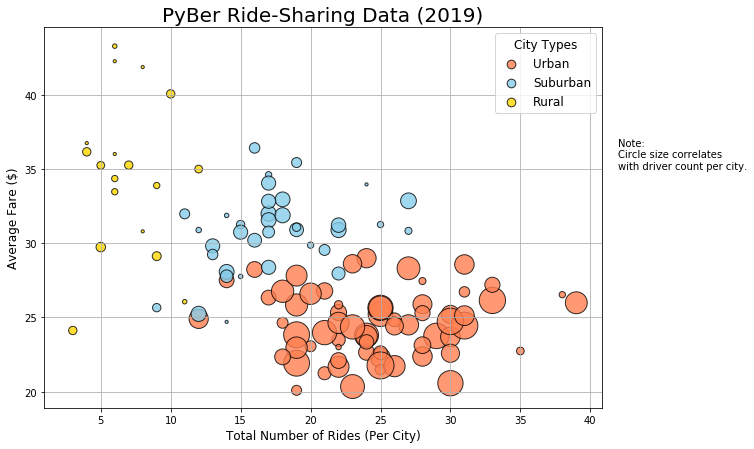

In [75]:
# Build scatter plots for each type (suburban, urban, rural)
plt.figure(figsize=(10,7))

plt.scatter(urban_ride_count, urban_avg_fare, c="coral", s=10*urban_driver_count, label="Urban", alpha=.8, edgecolors="black", linewidths=1)
plt.scatter(suburban_ride_count, suburban_avg_fare, c="skyblue", s=10*suburban_driver_count, label="Suburban", alpha=.8, edgecolors="black", linewidths=1)
plt.scatter(rural_ride_count, rural_avg_fare, c="gold", s=10*rural_driver_count, label="Rural", alpha=.8, edgecolors="black", linewidths=1)

# neat and tidy
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about circle size. 
plt.text(42, 35, "Note:\nCircle size correlates \nwith driver count per city.")

# Save figure
plt.savefig("analysis/Fig1.png")

plt.show()